# **ENGS 108 Fall 2022 Assignment 5**

*Due October ??, 2022 at 11:59PM on Canvas*

**Instructors:** George Cybenko

**TAs:** Clement Nyanhongo and Chase Yakaboski


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).


In [ ]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import sys 
import matplotlib.pyplot as plt
import os 
from PIL import Image
import seaborn as sns
from copy import deepcopy 

# **Data Loading**
Upload the dataset for this assignment 

In [ ]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours. 
image_path = 'images/'


# Load images 
images = os.listdir(image_path)
print(images)

['image_1.jpg', 'image_2.jpg', 'image_3.jpg']


## **Problem 1: Revisit: $K$-Means Clustering (Color Compression)**
In this problem, we revisit the K-means clustering algorithm to compress the number of pixels in an image. We will also implement the algorithm from scratch.

Display set of images 

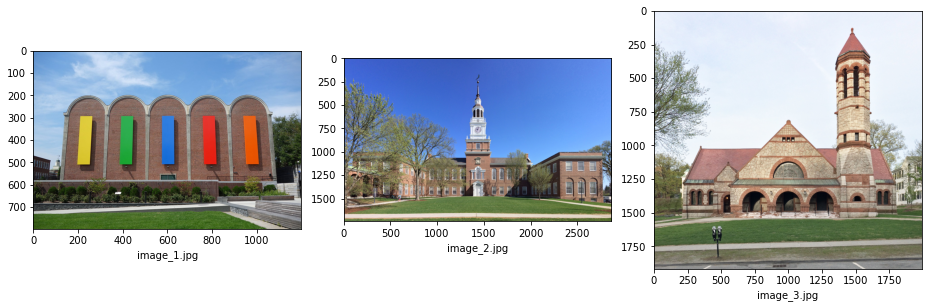

In [ ]:
#display all images in a 1*5 subplot     
fig, axes = plt.subplots(1, 3, figsize = (13, 10))

for i, d in enumerate(images):
    img = plt.imread(image_path + d)
    axes[i].imshow(img)
    axes[i].set_xlabel(d)

fig.tight_layout(h_pad=1, w_pad=1)

In [ ]:
# The following function resizes the image to return a size*size rgb vector representing an image
def image_resize (img_path, size):
    # resize image 
    img = Image.open(img_path)
    img = img.resize((size, size), Image.ANTIALIAS)
    return img

> **a)** Resize and display all the given images to a $64*64$ image in RGB format

In [ ]:
def resize_all (images): 
    
    new_images = []    # array to store resized images 
    
    for i in images:
        new_images.append(image_resize(image_path + i, 64))
        
    return new_images 

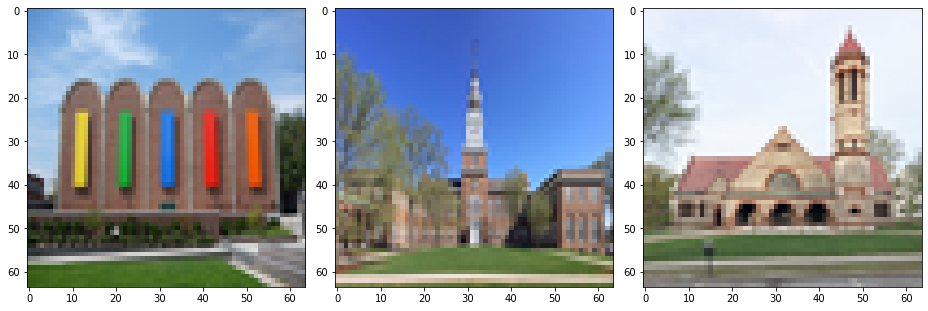

In [ ]:
# display the resized images below
new_images = resize_all(images)

def plot_images (new_images):
    fig, axes = plt.subplots(1, 3, figsize = (13, 10))

    for i, d in enumerate(new_images):
        axes[i].imshow(d)

    fig.tight_layout(h_pad=1, w_pad=1)
    
plot_images(new_images)

b) Details of the naive Kmeans clustering algorithm are provided in https://en.wikipedia.org/wiki/K-means_clustering
    

    Based on the naive Kmeans, we will implement our algorithm as follows:

        1. Initialize a set of k pixel locations as your clusters (at time 0 this is done randomly, afterwards they are
            computed in step 4).

        For each image pixel:
            2. Find the distance of each pixel to each cluster (will use Euclidean distance)
            3. Assign pixel-color to the color of its closest cluster
            4. Recompute the cluster centers based on color assignments and repeat procedure 

        The procedure is done for n-steps. 
    
    
**This procedure is described in the function below:**

In [ ]:
def my_Kmeans (k, image, n_runs):
    """ 
    k - number of clusters 
    image - image array
    n_runs - number of k-means iterations 
    """
    
    # 1. initialize cluster centers (at t = 0)
    K_clusters = initialize_clusters(image, k)
       
    for iteration in range(n_runs):
        
        # pixel_location is a disctionary (key = index of k-cluster, value - list of locations
        #           of the image pixels belonging to the kth cluster 
        pixel_locations = {i:[] for i in range(k)}
        
        # 2. compute distance from each image pixel to the clusters ((i, j) - location of each pixel))
        for i in range(len(image)):
            for j in range(len(image[0])):
                dist_to_clust = distance_to_cluster (i, j, K_clusters, image)   # Euclidean distance 
                
                # 3. change pixel color to that of its closest cluster 
                change_pixel_color(image, i, j, K_clusters, dist_to_clust, pixel_locations)
                
        # 4. reassign clusters by computing new pixel centers 
        K_clusters = re_assign_clusters (pixel_locations, K_clusters)
        
    # return image after the kmeans algorithm compresison
    return image 

**Complete the following functions to perform the Kmeans algorithm**

>**c)**. TODO: Write a function to initialize a set of pixel clusters given an individual image 

In [ ]:
# is necessary, use the numpy random library to select k - (x, y) coordinates from the given image. The RGB value 
# of these k-locations are the initial cluster centers 

def initialize_clusters(image, k):
    
    K_clusters = [] # cluster centers 
    
    # TODO: Find random clusters here 
        
    # Your output should be a list of k random clusters each in the form [x, y, RGB_pixel] where x, y is the location
    return K_clusters 

TypeError: 'NoneType' object is not iterable

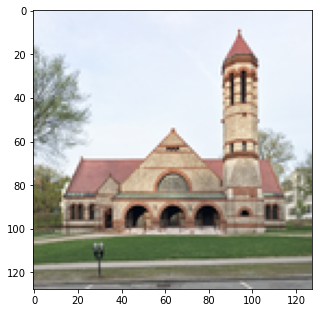

In [ ]:
# To test your initialize_cluster functions, we will plot an image as well as its cluster centres 

img_path = 'images/image_3.jpg'
 
img = np.asarray(image_resize (img_path, 128))
clusters = initialize_clusters(img, 20)
    
# plot image 
fig, axes = plt.subplots(figsize = (5, 20))
axes.imshow(img)

clusters = initialize_clusters(img, 20)
# plot initialized cluster centers in color = blue 
for k in clusters:
    axes.plot(k[0], k[1], '*', color = 'red')    


>**c)**: TODO: Write a function to find the distance from each image pixel to all the clusters centres

In [ ]:
# function to compute the pixel distance from pixel (i, j) to each of the K clusters 
# pixel distance = Euclidean distance of an (i, j) pixel to each a pixel in k

# After recomputing new clusters, some
def distance_to_cluster (i, j, K_clusters, image):
    
    distances = [sys.maxsize for i in range(len(K_clusters))]  # initialize distance by a large number (caters for Nones)
    
    # TODO: Write function to modify distances with actual distances

        
    return distances   # vector of Euclidian distances from each image's pizel value, to each cluster's pixel value 


>**d)** TODO: Change pixel color to that of its closest cluster (in terms of distance)

In [ ]:
# pixel_locations is a dictionary with key - index to a cluster, value - list of locations to the cluster
# dist_to_clusters - distance from pixel at (i, j) to the K pixel clusters 

def change_pixel_color(image, i, j, K_clusters, dist_to_clusters, pixel_locations):
    
    """
    (i, j) : Coordinates of pixel 
    pixel_locations - is a dictionary with key > index to a cluster, value > list of locations to the cluster
    dist_to_clusters - distance from pixel at (i, j) to the K pixel clusters 
    """
    
    # TODO: change pixel color to that of its closes cluster based on dist_to_clusters     
    return; 


>**e)**. TODO: Reassign the new clusters 

In [ ]:
def re_assign_clusters (pixel_locations, K_clusters):
    
    new_clusters = [[] for i in range(len(K_clusters))]   # This will have our clusters 
    
    #TODO:
    # Iterate the pixel locations dictionary  (represents pixels of the same color) and compute the mean (x, y) coordinate 
    # The pixel of this x, y coordinate is the new cluster center  (round of value of x and y to get integers)
    # new_clusters should be a list with entries of the form [x, y, RGB_pixel], where (x, y) are the computed new pixel 
    #     locations 
    
    # Complete here! 
    
    # Note: Ensure that new_clusters has a size of K. If new cluster has no images, leave it as an empty list, []
        
    return new_clusters # should be in the format of K_clusters 

        

**Function performs Kmeans and returns the original and the modified images**

In [ ]:
def perform_Kmeans (image_set, k, n_runs):
    
    images = [np.asarray(img) for img in image_set]
    
    store = []
    # perform K _means to all images
    for i, image in enumerate(images):
        print("processing image = ", i)
        processed_image = my_Kmeans(k, deepcopy(image), n_runs)
        store.append(processed_image)
    
    # plot images before Kmeans 
    plot_images (images)    

    # plot images after Kmeans
    plot_images(store)
    
    return images, store

>**f)** Run a k means clustering algorithm to compress an image based on k and n_runs

In [ ]:
def number_of_unique_pixels (images):
     # compute the average number of unique pixels in the set of original images 
        
    pixel_set = []
    for img in images:
        arr = []
        for i in range(len(img)):
            for j in range(len(img[0])):
                pixel = tuple(img[i, j])
                arr.append(pixel)
        pixel_set.append(len(arr))
        
    return sum(pixel_set)/len(images)

In [ ]:
# The average number of pixels in the compressed image = 30 
k, n_runs  = 30, 2

original, compressed = perform_Kmeans(new_images, k, n_runs)
average_original_pixels = number_of_unique(original)
print('compression factor = {}%'.format(k/average_original_pixels*100))

processing image =  0


TypeError: 'NoneType' object cannot be interpreted as an integer

In [ ]:
# The average number of pixels in the compressed image = 300

k, n_runs  = 30, 20

original, compressed = perform_Kmeans(new_images, k, n_runs)
average_original_pixels = number_of_unique(original)
print('compression factor = {}%'.format(k/average_original_pixels*100))

processing image =  0


TypeError: 'NoneType' object cannot be interpreted as an integer

In [ ]:
# The average number of pixels in the compressed image = 300

k, n_runs  = 1000, 20

original, compressed = perform_Kmeans(new_images, k, n_runs)
average_original_pixels = number_of_unique(original)
print('compression factor = {}%'.format(k/average_original_pixels*100))

processing image =  0


TypeError: 'NoneType' object cannot be interpreted as an integer

>**g)** Whats the effect of increasing the number of iterations, n_runs? Whats the effect of increasing k?

In [ ]:
#TODO

>**h)** For our stopping criterion, we used the number of iterations (n_runs) to finish a run. What alternative method (or 
metric) could you use to automate the stopping criterion?

In [ ]:
#TODO

## **Problem 2: Reinforcement Learning (RL): GRID-World**

In this problem, the goal is to train an AI that traverses an $n \times n$ grid to find paths that lead to the bottom right corner $(n-1, n-1)$, from the top left corner, (0, 0). Assune $n = 15$, and the terminal (end) states of the grid include the desired state $(14, 14)$ as well as areas with quicksand (death traps!). An agent gets a reward of 0 when it moves to a state that is not terminal, 1 when it moves to the desired state $(14, 14)$, and -1 when it moves into a quicksand. The game ends whenever the agent reaches a terminal state. 

Use the code below to generate a heatmap representing the gridworld.

In [1]:
def generate_world (grid_size):
    fig, axes = plt.subplots(figsize = (10, 6))
    
    # Quick sand locations that we want to avoid 
    quicksand = [(2, 4), (3, 3), (4, 2), (12, 3), (13, 2), (11, 4), (11, 9), (6, 10), (6, 11), (5, 11), (10, 10)]
    
    grid = np.zeros((grid_size, grid_size))
    for danger in quicksand:  # These are signified by a reward of -1 
        x, y = danger 
        grid[x, y] = -1
        
    # The location we want to traverse to!  (reward = 1)
    grid[grid_size -1, grid_size -1] = 1  
            
    df = pd.DataFrame(grid)
    sns.heatmap(df, cmap='YlOrRd', linewidths=1, linecolor='grey')
    axes.xaxis.set_ticks_position("top")
    axes.set_xlabel('x')
    return grid 

gridsize = 15
rewards = generate_world(gridsize)    


NameError: ignored

To run any RL, we need to specify a Markov Decision Process which is a tuple comprising of ${S,A,P, R, \gamma}$. In this problem: <br>

> $S$ - denotes states, which are the grid coordinates, (x, y). <br> 
> $A$ - denotes agent actions: will consider the following 1-step movement actions $(0 - right, 1 - down, 2 - left, 3 - up)$ <br>
> $P$ - denotes the transition matrix $P: S\times A \times S$ which is the probability of going to state $s'$, from state $s$, via action $a$. We will consider a deterministic environment where  $p(s, a, s') = 1$ if it's possible to take action $a$ from state $s$ leading to state $s'$, otherwise its $0$ <br> 
> $R$ - the reward for the goal state, $(x = gridsize -1, y = gridsize -1) = 1$. The reward for quicksand locations = -1, the reward for any other state = 0.<br>
> $\gamma$ - discount factor. Variable caters for preference of immediate rewards over long-term rewards. We will consider $\gamma = 0.8$ <br>

Several Reinforcement Learning algorithms exist in literature. In this problem we will examine: <br>
1. Q-Learning  <br>
2. Deep Q-Learning

> **a) Q-Learning**. The algorithm for Q-learning is shown below <br> 

![qlearning_1.png](attachment:qlearning_1.png)

Source: https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf

Another look at the algorithm is shown below:
![q_learning2.png](attachment:q_learning2.png)
Source: https://en.wikipedia.org/wiki/Q-learning.

> In short, we are updating the current q-values by adding proportions of the previous q-value, the reward for the current transition (s, a, s'); and some portion of the maximum discounted future q-values. 

> **(a1)** TODO: Initialize a q-table $Q(s, a)$ which comprises of each state $s$, and the possible movement actions from each states. <br>  $\;\;\;\;\;$ Dimensions should be $Q: S\times A$, where $S$ - state space, $A$ - action space. <br><br> 
$\;\;\;\;\;$ Note: Table should be initialized to zeros! -Represent the q-table as a dictionary with states representing the grid locations, <br> $\;\;\;\;\;$ and a list representing the possible 4 actions (integers) from each state. 

In [ ]:
#  TODO: Initialize Q-table 

Q = {} 

# complete initiatization of Q!


> **(a2)** TODO: Write a function to determine whether a state (x, y) is terminal (end state). Terminal states are quicksand locations with a reward = -1 and the goal state with a reward of 1.

In [ ]:
#TODO: is_terminal state? 

def is_terminal (x, y, rewards):
    # (x, y) - input state 
    # rewards - the grid's reward function 
    
    # Return boolean indicating is state is terminal

> **(a3)** TODO: Given a current state, $s$, write a function to compute the set of all successive states (in 1-timestep) that an agent can traverse <br> $\;\;\;\;\;$ to as well as their corresponding actions. For example, if an agent is in state $(0, 0)$, it can go to state $(0, 1)$ by taking the right action = 0; $\;\;\;\;\;$ it can also go to state $(1, 0)$ by taking the down action = 1. (NOTE: In some states, all 4 actions cannot be performed. For example, in <br> $\;\;\;\;\;$ state $(0, 0)$ an agent can't go up or left - hence your function should not consider these cases).

In [ ]:
# TODO: Get successive states
def get_next_states (x, y, gridsize):
    # (x, y) - current state
    
    next_states = []   # list of successive state s' from state s 
    next_actions = [] # list of actions taken to move to state s' from state s (should have same length as next_states) 
    
    # Complete below 
    
    return next_states, next_actions

> **(a4)** TODO: From part a, you can see the variable labeled as the **estimate of the optimal future value, maxQ**. <br> $\;\;\;\;\;$ Using your q-table, and your next states list, compute the maxQ value as well as the action needed to get this value: 

In [ ]:
# TODO: compute the maxQ value 
def get_maxQ (x, y, Q, next_states, next_actions):
    # (x, y) - current state 
    # Q - table of q-values 
    # next_states - list of the states that you can visit from state (x, y)
    # next_actions - list of the actions needed to move from state (x, y) to the corresponding next_states 
    
    #TODO: Compute maxQ: 
        #If multiple actions can yield the same maxQ, select the return action randomly
   
    # return maximum Q_value as well as the action leading to it (from next_actions)
    return  maxQ, max_action

> **(b1)**  TODO: To move within the grid,  and agent can be greedy and choose actions that takes it to states with the maximum q-values. <br> $\;\;\;\;\;$ However, this behavior has a tradeoff of not navigating other potentially beneficial states the agent might have missed in initial <br> $\;\;\;\;\;$ learning phases, hence several techniques are devised to determine which action an agent should choose. One of the most popular <br> $\;\;\;\;\;$ techniques is the e-greedy method where an agent is greedy $(1-\alpha)$ times, but also explores other states at a rate of $\alpha$. <br><br> $\;\;\;\;\;$ Implement the e-greedy method below: 

In [ ]:
def e_greedy (alpha, x, y, max_action, next_actions):
    # (x, y) - current state 
    # max_action - greedy action 
    # next_actions - set of all actions the agent could potentially take 
    # alpha - probability of taking a non-greedy action 
    
    # Complete here!
    
    return action  # action after e-greedy method 

> **(b2)** TODO: Now lets compile all the components we need to write the q-learning algorithm. 

In [ ]:
def QLearning (rewards, Q,  gridsize = 15, alpha = 0.2, discount = 0.8, learning_rate = 0.5, epochs = 10000):
    # (x, y) - initial state for the agent 
    # alpha - exploration probability during action selection 
    # Q - q-table 
    
    sumQ = []     # list of the sums of q-values for each epoch  
    Trajectories = []     # list of trajectories collected for each individual epoch 
    
    for epoch in range(epochs): 
        
        x, y = 0, 0  # start from initial state 

        new_trajs = [(x, y)]  # store trajectory (paths) sequences 
    
        while not is_terminal(x, y, rewards):  # run until we reach a terminal state 
            
            # get the potential successive states and actions here 
            next_states, next_actions = get_next_states(x, y, gridsize) 
            
            # compute maxQ 
            maxQ, max_action = get_maxQ (x, y, Q, next_states, next_actions)

            # e-greedy method to choose either the max_action, or a random action at a rate of alpha 
            action = e_greedy(alpha, x, y, max_action, next_actions)
            
            # compute new state based on the previous action  
            index = next_actions.index(action)
            x_next, y_next = next_states[index] 

            #  TODO: UPDATE Q-VALUES HERE:  
            #  UPDATE Q-value - should be a one liner!

            # update states 
            x, y = x_next, y_next 
            
            # add new state to trajectories 
            new_trajs.append((x, y))
                 
        sumQ.append(sum([sum(Q[k]) for k in Q]))
        
        Trajectories.append(new_trajs)
        
    return sumQ, Trajectories 

> **(b3)** Now perform Q-learning below: 

In [ ]:

Qvals = deepcopy(Q)
sumQ, Trajectories = QLearning(rewards, Qvals)

>**(c)** Plot a scatter plot of the sum of q-values (sumQ). How many trajectories are needed to reach convergence? 

In [ ]:
fig, axes = plt.subplots(figsize = (13, 8))
axes.plot(sumQ, '*', color = 'red')
axes.set_xlabel('epochs')
axes.set_ylabel('sumQ')

> **(d1)** TODO: The list $Trajectories$ records each trajectory obtained while performing Q_learning. Using the first 10 trajectories plot a heatmap showing whether a state has been visited or not?

In [ ]:
# TODO: Conplete the visitations array for the first 10 trajectories 
# indicate a state that has been visited as a one, and not visted as a 0

is_visited = np.zeros((gridsize, gridsize))

# fill up visitations here 
for Traj in Trajectories[:10]:
    for state in Traj:
        x, y = state 
        is_visited[x, y] = 1
        
visitations = is_visited

In [ ]:
fig, axes = plt.subplots (1, 2, figsize = (20, 8))

df = pd.DataFrame(visitations)
sns.heatmap(df, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[0])
axes[0].xaxis.set_ticks_position("top")
axes[0].set_title('visitation map')

df1 = pd.DataFrame(rewards)
sns.heatmap(df1, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[1])
axes[1].xaxis.set_ticks_position("top")
axes[1].set_title('rewards')

> **(d2)** Plot a similar plot for the last 10 trajectories 


In [ ]:
visitations = np.zeros((gridsize, gridsize))

print(len(Trajectories[len(Trajectories) - 5: ]))


# fill up visitations here 
for Traj in Trajectories[len(Trajectories) - 5: ]:
    for state in Traj:
        x, y = state 
        visitations[x, y] = 1
        
print(visitations)

In [ ]:
fig, axes = plt.subplots (1, 2, figsize = (20, 8))

df = pd.DataFrame(visitations)
sns.heatmap(df, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[0])
axes[0].xaxis.set_ticks_position("top")
axes[0].set_title('visitation map')

df1 = pd.DataFrame(rewards)
sns.heatmap(df1, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[1])
axes[1].xaxis.set_ticks_position("top")
axes[1].set_title('rewards')

> **(d3)** Comment on differences between observations in d1 vs d2? Does Q-learning find a policy that avoids obstacles? 

> **BONUS: DEEP Q-LEARNING**  In Q-learning, we create a Q-table that has a size of $S*A$ where $S$ is the state-space, $A$ is the action-space. When we have a large state space, updating the q-values becomes computationally expensive hence deep learning techniques have been incorporated to scale training. One such application is to have a Q-network that takes a state as input, and predicts the q_values of the state under different actions. In this case, we don't have to store all the states in a table, and we can use the network to predict q-values.

![q_learning3.png](attachment:q_learning3.png)

Source: https://www.assemblyai.com/blog/reinforcement-learning-with-deep-q-learning-explained/

> **(e)**  Write some detailed psuedocode (and maybe implement if you can!) on how you could perform deep Q-learning using the architecture above. You can follow the structure of algorithm in (a)